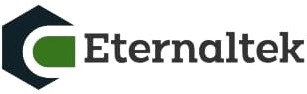

# Day -16/100 of Data Science 

## Supervised Learning 
- Supervised learning is a category of machine learning that uses labeled datasets to train algorithms to predict outcomes and recognize patterns. 

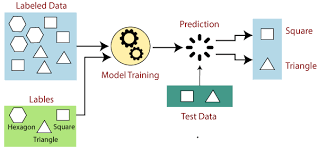

## Supervised Learning Algorithms
- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machine(SVM)
- K-Nearest Neighbors (KNN)

# Linear Regression

- Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. 
- The basic idea is to find the best-fitting straight line (or hyperplane in the case of multiple independent variables) that minimizes the difference between the observed and predicted values of the dependent variable.

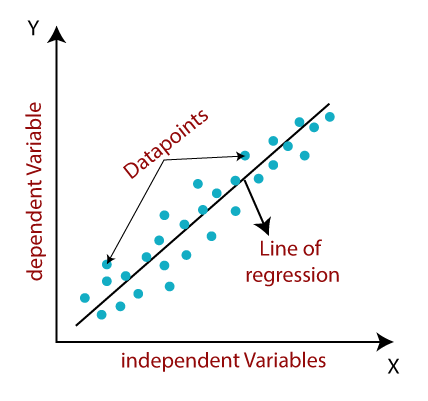

### Types of Linear Regression
- Linear regression can be further divided into two types of the algorithm:

### Simple Linear Regression:
- If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

#### Formula
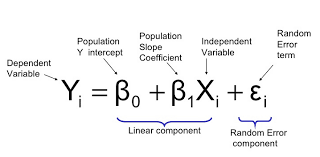


- Y = mx + c


### Multiple Linear regression:
- If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

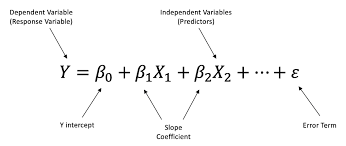

## Linear Regression Line

- A linear line showing the relationship between the dependent and independent variables is called a regression line. A regression line can show two types of relationship:

### Positive Linear Relationship:
- If the dependent variable increases on the Y-axis and independent variable increases on X-axis, then such a relationship is termed as a Positive linear relationship.

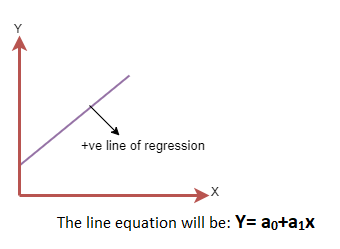

### Negative Linear Relationship:
- If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis, then such a relationship is called a negative linear relationship.

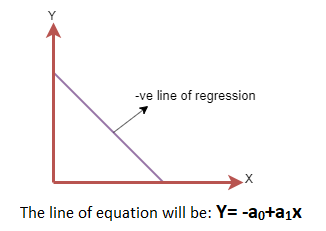


## Finding the best fit line

- To find the best fit line that means the error between predicted values and actual values should be minimized. 
- The best fit line will have the least error.

### Mean Squared Error (MSE)

- For Linear Regression, we use the Mean Squared Error (MSE) cost function, which is the average of squared error occurred between the predicted values and actual values. 
- It can be written as:

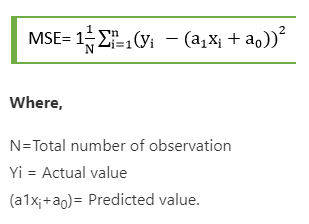

# Implementation of Linear Regression

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [3]:
#Load dataset into jupyter notebook

# Loading the data  
data = pd.read_csv(r'C:\Users\TEKS108\Vamsi Reddy\cardata.csv') 


In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#numerical stats
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#missing values
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Data Preprocessing

In [9]:
data['Age'] = 2024 - data['Year']
data.drop('Year',axis=1,inplace = True)

In [10]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [11]:
data.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [12]:
data.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

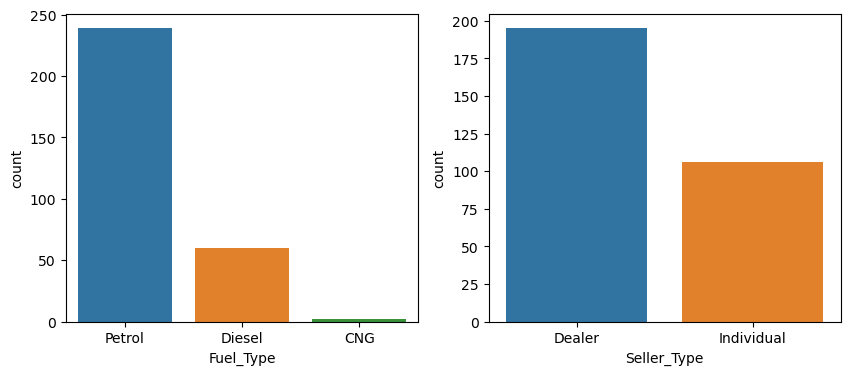

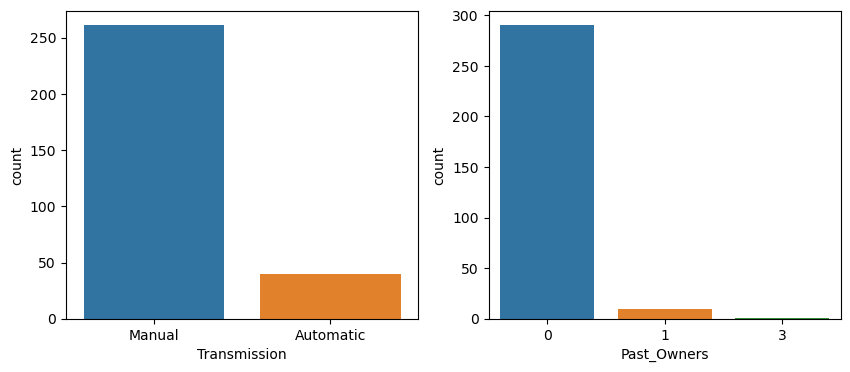

In [13]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    plt.show()

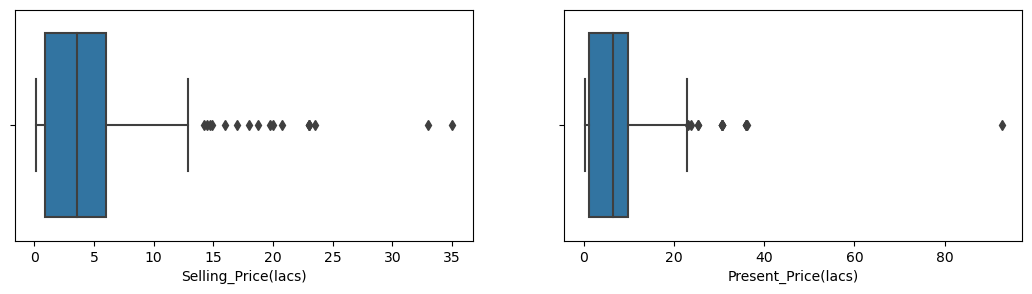

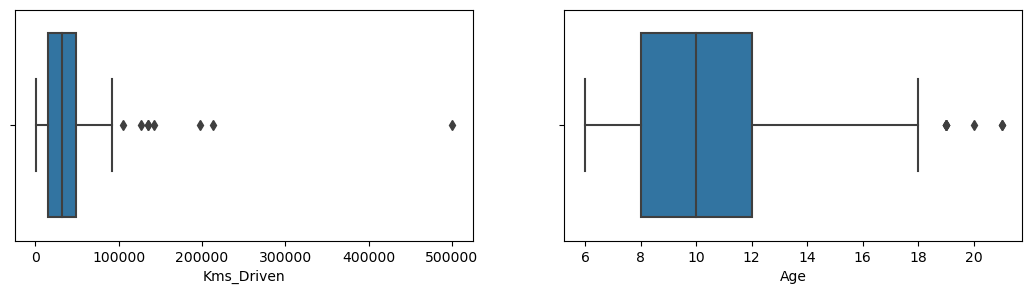

In [14]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
 
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

In [15]:
data.drop(labels='Car_Name',axis= 1, inplace = True)

In [16]:
data = pd.get_dummies(data = data,drop_first=True)

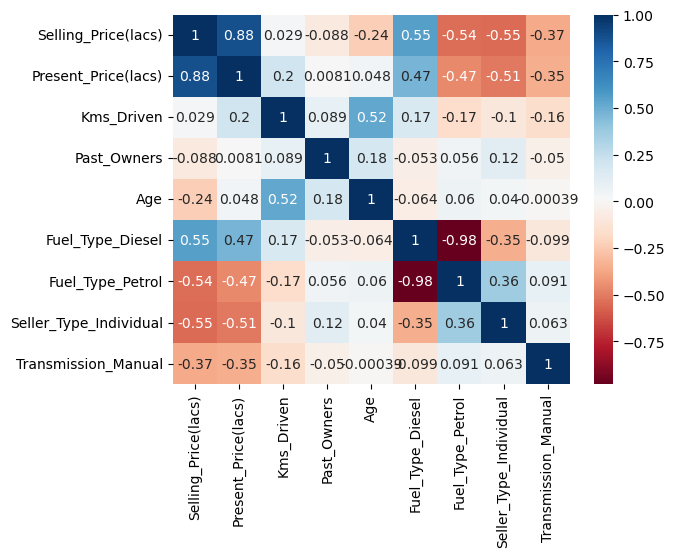

In [17]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [18]:
data.corr()['Selling_Price(lacs)']

Selling_Price(lacs)       1.000000
Present_Price(lacs)       0.878983
Kms_Driven                0.029187
Past_Owners              -0.088344
Age                      -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: Selling_Price(lacs), dtype: float64

## Train-Test Split

In [19]:
# Separating target variable and its features

x = data.drop('Selling_Price(lacs)',axis=1)
y = data['Selling_Price(lacs)']

In [20]:
x.head()

,Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price(lacs), dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [23]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 4.37233976e-01 -5.30613944e-06  3.45912849e-01 -4.13270098e-01
  2.23050770e+00  4.58549217e-01 -1.20927814e+00 -1.87014327e+00]
Intercept: 7.073759933489658


In [25]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.98238486185975


In [30]:
error= y_test-y_pred
print(error)

285   -0.462732
248    1.031713
150    1.090305
217   -1.063360
107    0.766824
         ...   
62    -1.730622
154   -0.162504
218    1.049726
286   -0.008562
186   -0.397876
Name: Selling_Price(lacs), Length: 61, dtype: float64


<Axes: ylabel='Selling_Price(lacs)'>

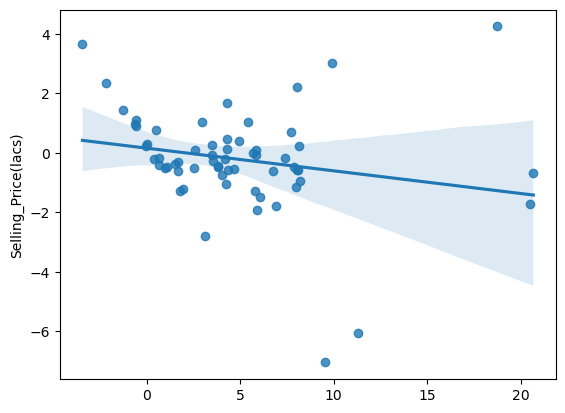

In [32]:
sns.regplot(x=y_pred, y=error, data=data)

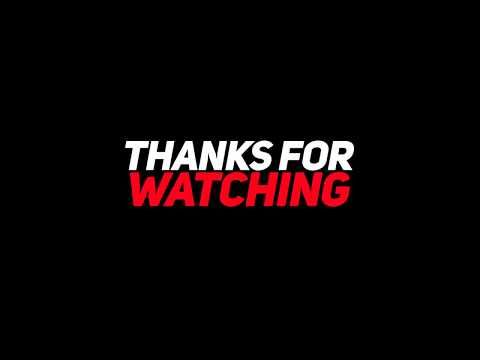

# Follow us on Social Media

Linkedin: https://www.linkedin.com/company/eternaltek/about/?viewAsMember=true



Medium: https://medium.com/@eternaltek.info


WhatsApp Channel: https://whatsapp.com/channel/0029Va5onCbDjiOTi6D1vU36


Github: https://github.com/Vamsi-2203